In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import os
import pathlib

In [32]:
data_dir = pathlib.Path("C:\\Users\\2276605\\OneDrive - Cognizant\\Documents\\Project SOLO\\Image Classification\\image_classification_model-main\\images_dataset")

batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_ds.class_names
print("Classes:", class_names)

Found 5313 files belonging to 5 classes.
Using 4251 files for training.
Found 5313 files belonging to 5 classes.
Using 1062 files for validation.
Classes: ['hoodie', 'pants', 'shirts', 'shoes', 'shorts']


In [33]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.Rescaling(1.0 / 255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

In [34]:
num_classes = len(class_names)

model = Sequential([
    layers.Input(shape=(img_height, img_width, 3)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')  # Output layer
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 45, 45, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     7,929,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,023,877 (30.61 MB)

 Trainable params: 8,023,877 (30.61 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
epochs = 15

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 130s 721ms/step - accuracy: 0.5930 - loss: 1.0503 - val_accuracy: 0.8352 - val_loss: 0.4733
Epoch 2/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 100s 741ms/step - accuracy: 0.8477 - loss: 0.4482 - val_accuracy: 0.8710 - val_loss: 0.3894
Epoch 3/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 98s 736ms/step - accuracy: 0.9035 - loss: 0.2892 - val_accuracy: 0.8908 - val_loss: 0.3346
Epoch 4/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 152s 809ms/step - accuracy: 0.9256 - loss: 0.2285 - val_accuracy: 0.8983 - val_loss: 0.3210
Epoch 5/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 103s 774ms/step - accuracy: 0.9349 - loss: 0.1830 - val_accuracy: 0.8889 - val_loss: 0.3544
Epoch 6/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 122s 914ms/step - accuracy: 0.9531 - loss: 0.1376 - val_accuracy: 0.9021 - val_loss: 0.3615
Epoch 7/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 125s 939ms/step - accuracy: 0.9676 - loss: 0.1022 - val_accuracy: 0.9049 - val_loss: 0.3759
Epoch 8/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 122s 913ms/step - accuracy: 0.9694 - 

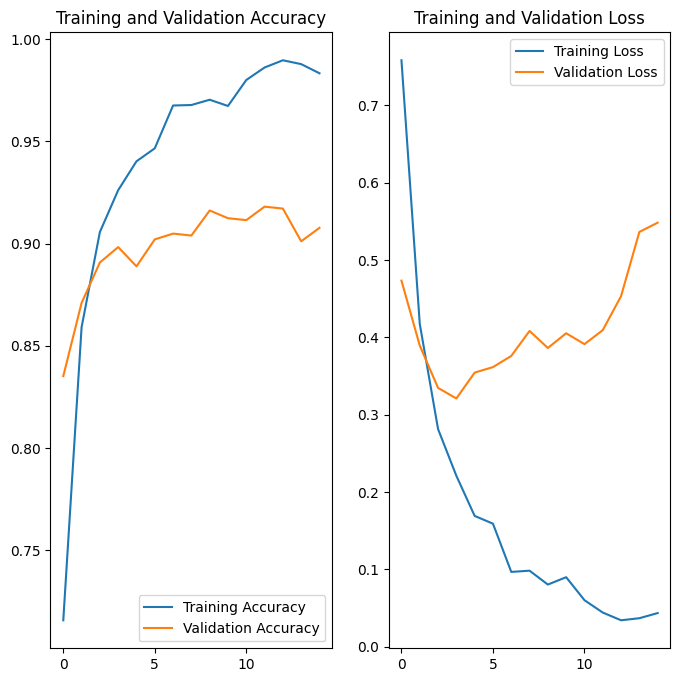

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [37]:
data_augmentation = keras.Sequential([
    Input(shape=(img_height, img_width, 3)),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

In [38]:
model = Sequential([
    layers.Input(shape=(img_height, img_width, 3)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')  # Output layer
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 45, 45, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     7,929,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,023,877 (30.61 MB)

 Trainable params: 8,023,877 (30.61 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
epochs = 10

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10


133/133 ━━━━━━━━━━━━━━━━━━━━ 81s 590ms/step - accuracy: 0.5435 - loss: 1.3097 - val_accuracy: 0.7891 - val_loss: 0.5997
Epoch 2/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 77s 580ms/step - accuracy: 0.8314 - loss: 0.4693 - val_accuracy: 0.8230 - val_loss: 0.4767
Epoch 3/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 79s 593ms/step - accuracy: 0.8744 - loss: 0.3659 - val_accuracy: 0.8748 - val_loss: 0.3663
Epoch 4/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 93s 697ms/step - accuracy: 0.9183 - loss: 0.2459 - val_accuracy: 0.8861 - val_loss: 0.3763
Epoch 5/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 84s 630ms/step - accuracy: 0.9354 - loss: 0.1984 - val_accuracy: 0.8748 - val_loss: 0.3739
Epoch 6/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 84s 630ms/step - accuracy: 0.9502 - loss: 0.1506 - val_accuracy: 0.8964 - val_loss: 0.3830
Epoch 7/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 95s 716ms/step - accuracy: 0.9584 - loss: 0.1301 - val_accuracy: 0.9040 - val_loss: 0.3277
Epoch 8/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 83s 621ms/step - accuracy: 0.9692 - loss: 0.0972 - val

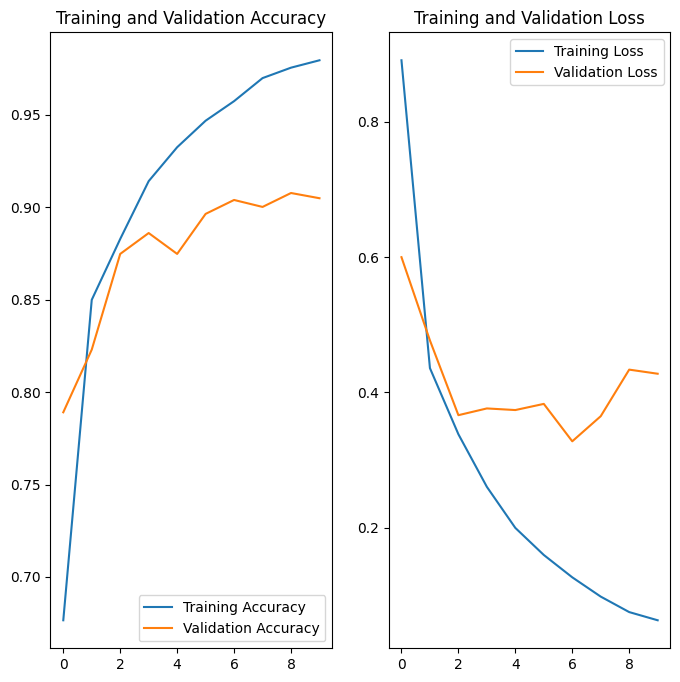

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [42]:
import PIL
img_path = "C:\\Users\\2276605\\Downloads\\1.jpg"
img = PIL.Image.open(img_path)
img = img.resize((180,180))
img_array = np.array(img) / 255.0
img_array = np.expand_dims(img_array, axis = 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f}% confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

img_path = "C:\\Users\\2276605\\Downloads\\2.jpg"
img = PIL.Image.open(img_path)
img = img.resize((180,180))
img_array = np.array(img) / 255.0
img_array = np.expand_dims(img_array, axis = 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f}% confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

img_path = "C:\\Users\\2276605\\Downloads\\3.jpg"
img = PIL.Image.open(img_path)
img = img.resize((180,180))
img_array = np.array(img) / 255.0
img_array = np.expand_dims(img_array, axis = 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f}% confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

img_path = "C:\\Users\\2276605\\Downloads\\4.jpg"
img = PIL.Image.open(img_path)
img = img.resize((180,180))
img_array = np.array(img) / 255.0
img_array = np.expand_dims(img_array, axis = 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f}% confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

img_path = "C:\\Users\\2276605\\Downloads\\5.jpg"
img = PIL.Image.open(img_path)
img = img.resize((180,180))
img_array = np.array(img) / 255.0
img_array = np.expand_dims(img_array, axis = 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f}% confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

img_path = "C:\\Users\\2276605\\Downloads\\6.jpg"
img = PIL.Image.open(img_path)
img = img.resize((180,180))
img_array = np.array(img) / 255.0
img_array = np.expand_dims(img_array, axis = 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f}% confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

img_path = "C:\\Users\\2276605\\Downloads\\7.jpg"
img = PIL.Image.open(img_path)
img = img.resize((180,180))
img_array = np.array(img) / 255.0
img_array = np.expand_dims(img_array, axis = 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f}% confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
This image most likely belongs to shirts with a 37.38% confidence.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
This image most likely belongs to shorts with a 33.43% confidence.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
This image most likely belongs to pants with a 40.45% confidence.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
This image most likely belongs to hoodie with a 40.46% confidence.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
This image most likely belongs to shoes with a 40.46% confidence.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
This image most likely belongs to shorts with a 26.64% confidence.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
This image most likely belongs to hoodie with a 40.44% confidence.
